In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/shuffled.csv", index_col=0)

/Users/tyler/.mambaforge/envs/nlp/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


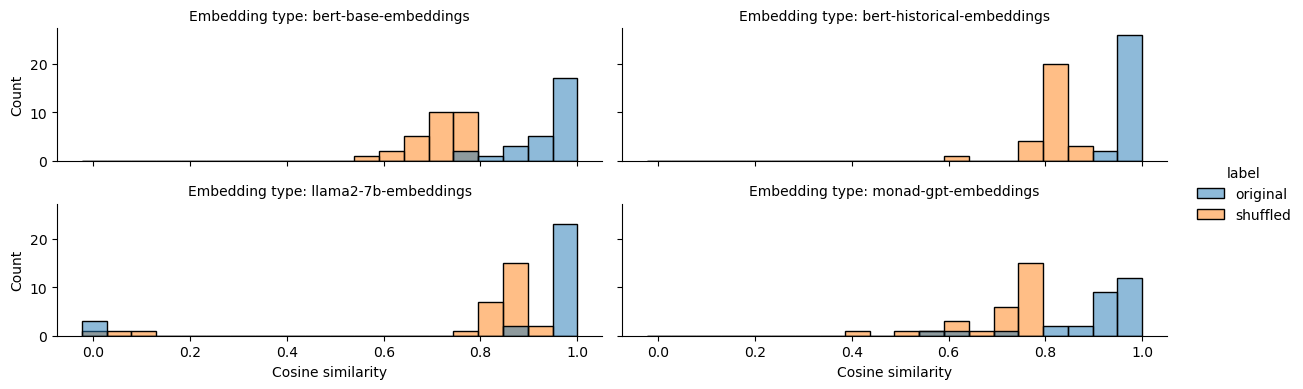

In [3]:
g = sns.displot(
    data=data,
    x="cosine_similarity",
    col="embedding_type",
    hue="label",
    bins=20,
    col_wrap=2,
    height=2,
    aspect=3
)
g.set(xlabel="Cosine similarity")
g.set_titles("Embedding type: {col_name}")
plt.show()

In [4]:
data.groupby(["embedding_type", "label"])["cosine_similarity"].describe()

count      mean       std       min  \
embedding_type             label                                           
bert-base-embeddings       original   28.0  0.935513  0.061938  0.781575   
                           shuffled   28.0  0.712914  0.053833  0.586531   
bert-historical-embeddings original   28.0  0.979272  0.018881  0.911316   
                           shuffled   28.0  0.816939  0.044315  0.632513   
llama2-7b-embeddings       original   28.0  0.881942  0.318530 -0.023794   
                           shuffled   28.0  0.771471  0.252315  0.019777   
monad-gpt-embeddings       original   28.0  0.907213  0.106920  0.584791   
                           shuffled   28.0  0.705556  0.089667  0.389525   

                                          25%       50%       75%       max  
embedding_type             label                                             
bert-base-embeddings       original  0.920172  0.966818  0.976494  0.989689  
                           shuffled  0.689005  0.729254  0.751770  0.791394  
bert-historical-embeddings original  0.975790  0.982422  0.992905  1.000000  
                           shuffled  0.806866  0.824843  0.841035  0.866242  
llama2-7b-embeddings       original  0.999501  0.999756  0.999864  0.999967  
                           shuffled  0.827990  0.854123  0.876933  0.901724  
monad-gpt-embeddings       original  0.903473  0.944460  0.971399  0.988767  
                           shuffled  0.688538  0.746645  0.761233  0.782623

In [5]:
def run_ttest(group: pd.Series) -> float:
    """Run a t-test for original and shuffled similarities."""
    orig = group.loc[group["label"]=="original", "cosine_similarity"]
    shuf = group.loc[group["label"]=="shuffled", "cosine_similarity"]
    test = stats.ttest_ind(shuf, orig)
    return test.pvalue


results = data.groupby("embedding_type").apply(run_ttest)

In [6]:
alpha = 0.05
print(
    f"Null hypothesis: randomly shuffled sentence similarities have the same average"
    f"\nas the original similarities\nReject?",
)
for name, pval in zip(results.index, results):
    print(f"{name}: {pval < alpha} (p = {pval:.4f})")

Null hypothesis: randomly shuffled sentence similarities have the same average
as the original similarities
Reject?
bert-base-embeddings: True (p = 0.0000)
bert-historical-embeddings: True (p = 0.0000)
llama2-7b-embeddings: False (p = 0.1561)
monad-gpt-embeddings: True (p = 0.0000)
